# Transfer Learning CIFAR-10(CNN's)

Libraries Included

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

#### Model Creation

load Resnet50

In [2]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [3]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images

*Changed the dataset*

In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


To train our model on the new dataset above, the architecture for everything besides the ResNet 50 portion has changed. To begin with, the input image of Cifar10 is 32x32 so it needs to be upscaled 3 times before we can pass it through the ResNet layers. After the images go through ResNet, we flatten our processed input and pass it though 2 dense layers. Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and 10 neurons. Since the method below is computationally expensive, let's only train it for 5 epochs.

*Added layers and changed architecture*

*Retrained the model*

In [6]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 725s 290ms/step - loss: 0.2471 - acc: 0.4549 - val_loss: 0.1112 - val_acc: 0.8161
Epoch 2/5
2500/2500 [==============================] - 726s 290ms/step - loss: 0.1580 - acc: 0.7050 - val_loss: 0.0729 - val_acc: 0.8890
Epoch 3/5
2500/2500 [==============================] - 726s 291ms/step - loss: 0.1196 - acc: 0.8010 - val_loss: 0.0545 - val_acc: 0.9180
Epoch 4/5
2500/2500 [==============================] - 725s 290ms/step - loss: 0.0942 - acc: 0.8579 - val_loss: 0.0447 - val_acc: 0.9317
Epoch 5/5
2500/2500 [==============================] - 725s 290ms/step - loss: 0.0759 - acc: 0.8911 - val_loss: 0.0372 - val_acc: 0.9395


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 42s 136ms/step - loss: 0.0372 - acc: 0.9395


[0.037207625806331635, 0.9394999742507935]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) multiple                  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
batch_normalization_v2 (Batc multiple                  524288    
_________________________________________________________________
dense (Dense)                multiple                  1

Training/validation loss and accuracy visualizations are below

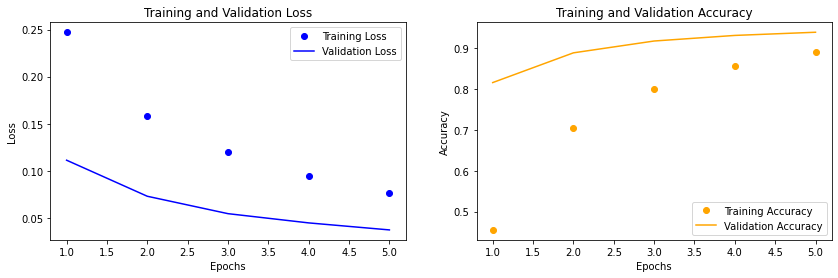

In [10]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()